In [1]:
# Import stuff
import pandas as pd
import matplotlib.pyplot as plt
from config import password
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:' + password + '@localhost:5432/employees')


In [5]:
# Get employee titles and Salaries and put them into a dataframe

this = engine.execute('select title, salary from employees inner join salaries on employees.emp_no = salaries.emp_no inner join titles on employees.emp_title_id = titles.title_id').fetchall()

title = []
salary = []

for that in this:
    (employee_title, employee_salary) = that
    title.append(employee_title)
    salary.append(employee_salary)

dept_sal = pd.DataFrame({"Title": title, "Salary": salary})

dept_sal

,Title,Salary
0,Staff,78228
1,Engineer,72488
2,Staff,42365
3,Senior Engineer,55881
4,Senior Engineer,41538
...,...,...
300019,Senior Engineer,49383
300020,Senior Engineer,41002
300021,Staff,40000
300022,Staff,52282


Text(0.5, 0, 'Salary Ranges($)')

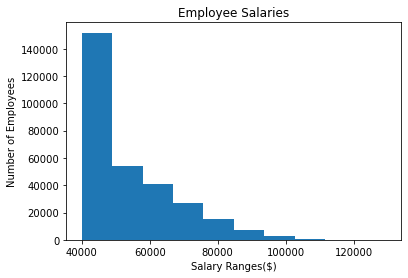

In [6]:
# Create a histogram to visualize the most common salary ranges for employees.

x = dept_sal["Salary"]
plt.hist(x)
plt.title("Employee Salaries")
plt.ylabel("Number of Employees")
plt.xlabel("Salary Ranges($)")


Text(0.5, 0, 'Employee Title')

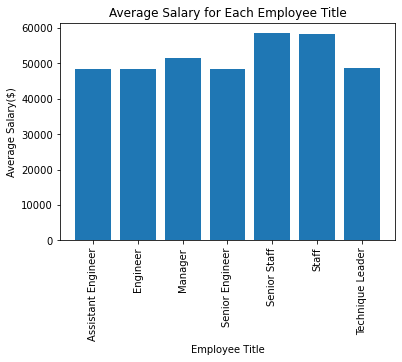

In [7]:
# Create a bar chart of average salary by title.

averages = pd.DataFrame(dept_sal.groupby(["Title"]).mean())
vals = averages["Salary"].values
better_avgs = []
for val in vals:
    better_avgs.append(round(val,2))
averages["Salary"] = better_avgs
averages.reset_index(level=0, inplace=True)

x = averages["Title"]
y = averages["Salary"]

plt.bar(x,y)
plt.xticks(rotation="vertical")
plt.title("Average Salary for Each Employee Title")
plt.ylabel("Average Salary($)")
plt.xlabel("Employee Title")

